## Homework 3 Part 2: Multiclass Classification using a Neural Network
Build a multilayer neural network for classification (See NN_multiclass_classification.ipynb) <br>
Try to improve accuracy by tuning the hyperparameters of the neural network <br>
such as the number of layers, the number of units in each layer, the type of activation functions <br>
Note: every time you change the layers or units, you need to re-create the model and the optimizer.<br> 
some people also consider the number of epochs as a hyperparameter  <br>
Do NOT use the testing dataset for hyperparameter tunig

In [10]:
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import torch

load `data` from the file 'fashion_mnist_data.pt'

In [11]:
#code
data = torch.load('fashion_mnist_data.pt')

print(data)

{'X_train': tensor([[   0.,    0.,    1.,  ...,    0.,    0.,    0.],
        [   0.,    0.,    0.,  ...,  135.,   51.,    0.],
        [   0.,    0.,    1.,  ...,    0.,    0.,    0.],
        ...,
        [   0.,    0.,    0.,  ...,    0.,    0.,    0.],
        [   0.,    0.,    0.,  ...,    0.,    0.,    0.],
        [   0.,    0.,    0.,  ...,    0.,    0.,    0.]]), 'Y_train': tensor([ 0,  2,  6,  ...,  3,  4,  9]), 'X_val': tensor([[   0.,    0.,    0.,  ...,    0.,    0.,    0.],
        [   0.,    0.,    0.,  ...,    0.,    0.,    0.],
        [   0.,    0.,    0.,  ...,    0.,    0.,    0.],
        ...,
        [   0.,    0.,    0.,  ...,  143.,   40.,    0.],
        [   0.,    0.,    0.,  ...,    0.,    0.,    0.],
        [   0.,    0.,    0.,  ...,    0.,    0.,    0.]]), 'Y_val': tensor([ 3,  4,  0,  ...,  6,  4,  2]), 'X_test': tensor([[   0.,    0.,    0.,  ...,    0.,    0.,    0.],
        [   0.,    0.,    0.,  ...,    0.,    0.,    0.],
        [   0.,    0.,    0

show the images

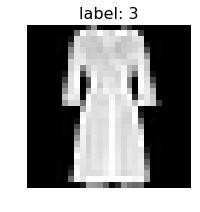

In [12]:
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, data['X_train'].shape[0], 1000):
    I = data['X_train'][n,:].reshape(28,28)
    ax.imshow(I, cmap='gray')
    ax.set_title('label: ' + str(int(data['Y_train'][n])), fontsize=16)
    ax.axis('off')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1) 

Note: the `data` contains the traning set, the validation set and the testing set

In [13]:
data['X_train'].size()

torch.Size([48000, 784])

In [14]:
data['Y_train'].size()

torch.Size([48000])

In [15]:
data['X_val'].size()

torch.Size([12000, 784])

In [16]:
data['Y_val'].size()

torch.Size([12000])

In [17]:
data['X_test'].size()

torch.Size([10000, 784])

In [18]:
data['Y_test'].size()

torch.Size([10000])

Normalize the pixel values into the range of 0 to 1

In [19]:
data['X_train']/=255
data['X_val']/=255
data['X_test']/=255

In [20]:
def shuffle(data):
    n = data["X_train"].size()[0]
    indices = np.arange(n)
    np.random.shuffle(indices)
    data["X_train"] = data["X_train"][indices]
    data["Y_train"] = data["Y_train"][indices]